## Ch 4 Training Models
Up to this point, models have been deployed as Black Box solutions.  Without really knowing anything about the underlying model, the solution was deployed, trained and optimized.  It is feasible to continue to conduct modeling in this way, but to truly find alignment between model algorithm and problems in the real world, it is helpful to understand how the algorithms work under the hood.

### Linear Regression
Linear Regression is one of the simplest models to deploy and understand.  While $y = m*x + b$ may be a familiar form, when moving into the vectorized mathmatics, things get a bit more in depth and complex.  Mathmatic notation will be present throughout these explanations, and may sometimes create confusion.  In those instances it is recommended to seek other references to help navigate the choppier waters.

There are two very different ways to train a linear regression model, which will be covered in this review:
- Using a direct closed form solution that directly computes the model parameters which best fit the model
- Using and iterative optimization process called Gradient Descent (GD) which gradually adjusts the model parameters to minimize the cost function over the training set until eventually converging to the same set of parameters as the first method. There are a number of varients, and GD will be featured heavily in Neural networks where there is not ability to directly compute model parameters.

Previously linear regression was leveraged to determine a simple linear model for life satisfaction:

$ LifeSatifaction = \theta_0 + \theta_1 \cdot GDP\_per\_capita$

While this seems a complicated recreation of the traditional equation of a line, a bit on translation can assist in demistifying the terminology. 
- The $\theta$'s are the model parameters.  
- The intercept in the tradition terminology is the $\theta_0$ term
- The GDP_per_capita is our x, and $\theta_1$ is the coefficient, also called the weighting term for the sum.

A linear model makes a prediction by computing a weighted sum of input features (GDP_per_capita) and $\theta$ to determine a predition of the target value.  This is the generic form of a liner model.

$\hat{y} = \theta_0 + {\theta_1}{x_1} + {\theta_2}{x_2} + ... + {\theta_n}{x_n}$

This can be rewritten in the vectorized for more concisely.  This means that the various features and weights are converted into arrays for vectorized mathmatics as a shorthand in places of the long form.

$\hat{y} = {h_\theta}{x} = {\theta}\cdot{x}$

- $\theta$ is the model's parameter vector including the intercept. 
- $x$ is the instances feature vector, containing $x_0 \dots x_n$, with $x_0$ always equal to 1
- $\theta \cdot x$ is the dot product of the two vectors which is equal to the long form of the weights times their feature vector.

>**NOTE**: The vectorized form can use either dot product notation as shown or matrix mulitplication, which transposes the first term.  This would result in $\hat{y} = {\theta^T}\cdot{x}$ as the written form.  This means that the result is a matrix in place of a scalar.  While it yields the same answer in a single cell matrix, when making multiple predictions, this approach will make more sense in the long run. [Difference between dot product and matrix multiplication](https://mkang32.github.io/python/2020/08/23/dot-product.html#:~:text=Matrix%20multiplication%20is%20basically%20a,of%20vectors%20in%20each%20matrix.)

### Training the model
To train the model, we continue to modify the parameters until it achieves the best fit of the training data.  The measure of fit for a regression model to the data is evaluated using the Root Mean Square Error or RMSE.  The goal is to find a $\theta$ vector that minimizes RMSE.  In practice it is easier to use the Mean Squared Error (MSE) to avoid negative numbers in the analysis.  

The MSE cost function for a linear regression model:

$ MSE(X, h_\theta) = \frac{1}{m}\displaystyle\sum_{i=1}^{m}(\theta^Tx^{i} - y^{i})^2$

### The Normal Equation
There happens to be a closed form solution to finding the $\theta$ value which minimizes the cost function.  This will provide the result directly for a linear regression problem to the correct parameter values.

$\hat{\theta} = (X^TX)^{-1}\cdot X^Ty$

In [1]:
import pandas as pd
import numpy as np
import sketch

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 11 ('lines.color: #0C479D'): Key lines.color: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 15 ('patch.edgecolor: #FFFFFF'): Key patch.edgecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 16 ('patch.facecolor: #0C479D'): Key patch.facecolor: '' does not look like a color arg


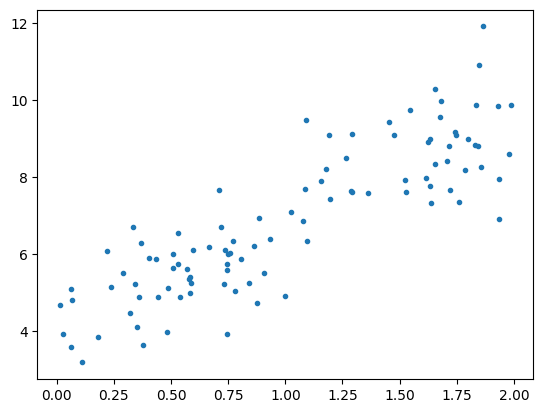

In [6]:
# generate some data for a test
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, marker='.', linestyle='');

In [7]:
# Computing theta requires X_b to have xO to each instance
X_b = np.c_[np.ones((100,1)),X] # adds one to each feature vector

In [11]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_best # original equation had 4 and 3, but the noise added caused the values to diverge

array([[4.04513249],
       [2.77707861]])

### Use parameters to predict
Now the calculated theta parameters can be used to predict new values. For this we must create a new set of feature values which does not have a target value and predict using the theta parameters.

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

In [14]:
y_predict = X_new_b.dot(theta_best)

In [15]:
y_predict

array([[4.04513249],
       [9.59928971]])

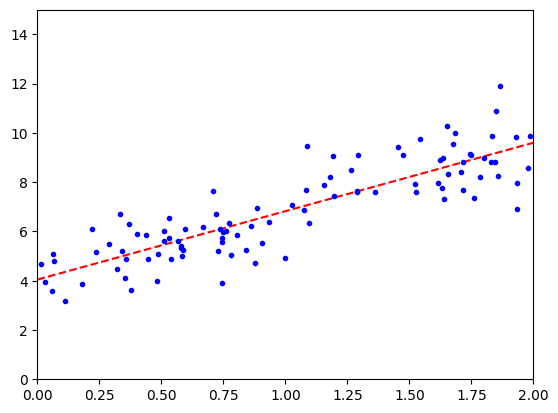

In [16]:
plt.plot(X_new, y_predict, "r--")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Performing same regression with Scikit Learn
Scikit learn packages away all of the vectorized mathmatics making the same exercise posible in only a few lines of code.  This is broken out into intermediate cells so the values can be inspected and predictive completion is available after instantiation of the code.

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg = LinearRegression()

In [19]:
lin_reg.fit(X, y) # matrix multiplication within the normal equation happens here

LinearRegression()

In [20]:
lin_reg.intercept_, lin_reg.coef_ # model parameters

(array([4.04513249]), array([[2.77707861]]))

In [21]:
lin_reg.predict(X_new) # And now there is a nice prediction

array([[4.04513249],
       [9.59928971]])